In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import một số thư viện quan trọng

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Python Vietnamese Toolkit
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 73.1 MB/s eta 0:00:00


# Load data

In [ ]:
DATA = '/content/drive/MyDrive/Hate Speech Detection/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Hate Speech Detection/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Hate Speech Detection/vihsd/test.csv'

# read data
train_data = pd.read_csv(DATA)
dev_data = pd.read_csv(DEV_DATA)
test_data = pd.read_csv(TEST_DATA)

print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
print('Phần tử đầu tiên trong X_train:')
print('\t', X_train[0])
print('Phần tử đầu tiên trong X_dev:')
print('\t', X_dev[0])
print('Phần tử đầu tiên trong X_test:')
print('\t', X_test[0])

Phần tử đầu tiên trong X_train:
	 Em được làm fan cứng luôn rồi nè ❤️ reaction quá hay quá cute coi mấy giờ này quá hợp lí =]]]
Phần tử đầu tiên trong X_dev:
	 Coi cười xỉu
Phần tử đầu tiên trong X_test:
	 Đừng cố biện minh =)))) choi lon


# Tiền xử lí dữ liệu

## Xử lí stopword trong tiếng Việt

Stop Words là một số từ ngữ, bị các công cụ tìm kiếm bỏ qua một phần hoặc hoàn toàn. Những từ như : “a, an, of, or, many vv …” chiếm khoảng 25% các bài viết blog trên web. Các từ này không hề có liên quan gì đến nội dung và ý nghĩa của bài viết. Các công cụ tìm kiếm, trong cả những truy vấn tìm kiếm lẫn trong kết quả đề xuất, thường bỏ qua những Stop Words này.

In [ ]:
STOPWORDS = '/content/drive/MyDrive/Hate Speech Detection/vihsd/vietnamese-stopwords-dash.txt'
with open(STOPWORDS, "r") as ins:
    stopwords = []
    for line in ins:
        dd = line.strip('\n')
        stopwords.append(dd)
    stopwords = set(stopwords)
print('Năm stopword đầu tiên: ')
list(stopwords)[:5]

Năm stopword đầu tiên: 


['trong_lúc', 'veo_veo', 'bằng_được', 'nghe_đâu_như', 'thanh']

In [ ]:
#Lọc các stopword
def filter_stop_words(train_sentences, stop_words):
  new_sent = [word for word in train_sentences.split() if word not in stop_words]
  train_sentences = ' '.join(new_sent)
  return train_sentences

In [ ]:
x = filter_stop_words(X_train[0], stopwords)
print(X_train[0])
print(x)

Em được làm fan cứng luôn rồi nè ❤️ reaction quá hay quá cute coi mấy giờ này quá hợp lí =]]]
Em fan cứng nè ❤️ reaction cute coi mấy hợp lí =]]]


## Xử lí emoji - biểu tượng cảm xúc trong tiếng Việt

In [ ]:
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

## Tổng hợp 2 phương thức trên

In [ ]:
from pyvi.ViTokenizer import ViTokenizer

Tokenization là quá trình tách một cụm từ, câu, đoạn văn, một hoặc nhiều tài liệu văn bản thành các đơn vị nhỏ hơn. Mỗi đơn vị nhỏ hơn này được gọi là Tokens. Có thể coi tokens là các khối xây dựng của NLP và tất cả các mô hình NLP đều xử lý văn bản thô ở cấp độ các Tokens.

In [ ]:
def preprocess(text, tokenized = True, lowercased = True):
    text = ViTokenizer.tokenize(text) if tokenized else text
    text = filter_stop_words(text, stopwords)
    text = deEmojify(text)
    text = text.lower() if lowercased else text
    return text

In [ ]:
x = preprocess(X_train[0])
print(X_train[0])
print(x)

Em được làm fan cứng luôn rồi nè ❤️ reaction quá hay quá cute coi mấy giờ này quá hợp lí =]]]
em fan cứng nè ❤ ️ reaction cute coi mấy hợp_lí = ] ] ]


## Rút trích đặc trưng

In [ ]:
def pre_process_features(X, y, tokenized = True, lowercased = True):
    X = [preprocess(str(p), tokenized = tokenized, lowercased = lowercased) for p in list(X)]
    for idx, ele in enumerate(X):
        if not ele:
            np.delete(X, idx)
            np.delete(y, idx)
    return X, y

In [ ]:
x, y = pre_process_features(X_train[:5], y_train[:5])
print(X_train[0], y_train[0])
print(x[0], y[0])

Em được làm fan cứng luôn rồi nè ❤️ reaction quá hay quá cute coi mấy giờ này quá hợp lí =]]] 0
em fan cứng nè ❤ ️ reaction cute coi mấy hợp_lí = ] ] ] 0


# Huấn luyện và kiểm thử mô hình

In [ ]:
import pandas as pd 
import numpy as np 
import re
import pickle

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from tensorflow.keras.layers import Reshape, Flatten, Dropout, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import text, sequence

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


In [ ]:
train_X, train_y = pre_process_features(X_train, y_train, tokenized=True, lowercased = True)
dev_X, dev_y = pre_process_features(X_dev, y_dev, tokenized=True, lowercased = True)
test_X, test_y = pre_process_features(X_test, y_test, tokenized=True, lowercased = True)

In [ ]:
def make_features(X, y, tokenizer, is_one_hot_label=True):
    X = tokenizer.texts_to_sequences(X)
    X = sequence.pad_sequences(X, maxlen=sequence_length)
    if is_one_hot_label: 
        y = to_categorical(y, num_classes=3)

    return X, y

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/Hate Speech Detection/cc.vi.300.vec'

# --------------LOAD WORD EMBEDDING -------------------------
embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
vocabulary_size = 10000
sequence_length = 100
embedding_dim = 300

tokenizer = text.Tokenizer(lower=False, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(train_X)
with open('/content/drive/MyDrive/Hate Speech Detection/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

word_index = tokenizer.word_index
# num_words = min(vocabulary_size, len(word_index) + 1)
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= vocabulary_size:
        continue

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Make features
train_X, train_y = make_features(train_X, train_y, tokenizer)
dev_X, dev_y = make_features(dev_X, dev_y, tokenizer)
test_X, test_y = make_features(test_X, test_y, tokenizer, is_one_hot_label=False)

## Text CNN

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 300)     5897100     input_1[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 100, 300, 1)  0           embedding[0][0]                  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 1, 32)    19232       reshape[0][0]                    
______________________________________________________________________________________________

/usr/local/lib/python3.10/dist-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/40
94/94 [==============================] - 16s 52ms/step - loss: 0.9019 - accuracy: 0.6870 - val_loss: 0.6989 - val_accuracy: 0.8196
Epoch 2/40
94/94 [==============================] - 2s 19ms/step - loss: 0.6287 - accuracy: 0.8271 - val_loss: 0.5794 - val_accuracy: 0.8196
Epoch 3/40
94/94 [==============================] - 2s 19ms/step - loss: 0.5339 - accuracy: 0.8305 - val_loss: 0.5181 - val_accuracy: 0.8237
Epoch 4/40
94/94 [==============================] - 2s 19ms/step - loss: 0.4819 - accuracy: 0.8382 - val_loss: 0.4843 - val_accuracy: 0.8320
Epoch 5/40
94/94 [==============================] - 2s 21ms/step - loss: 0.4474 - accuracy: 0.8466 - val_loss: 0.4614 - val_accuracy: 0.8394
Epoch 6/40
94/94 [==============================] - 2s 20ms/step - loss: 0.4193 - accuracy: 0.8552 - val_loss: 0.4439 - val_accuracy: 0.8409
Epoch 7/40
94/94 [==============================] - 2s 20ms/step - loss: 0.3960 - accuracy: 0.8613 - val_loss: 0.4290 - val_accuracy: 0.8458
Epoch 8/40
9

<Axes: >

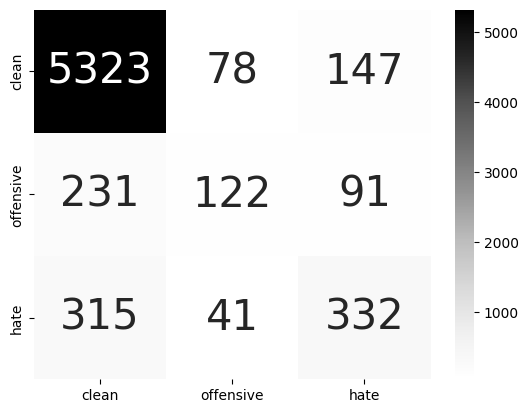

In [ ]:
MODEL_FILE = '/content/drive/MyDrive/Hate Speech Detection/model/Text_CNN_model_v13.h5'

vocabulary_size = 10000
sequence_length = 100

embedding_dim = 300
batch_size = 256
epochs = 40
drop = 0.5

filter_sizes = [2,3,5]
num_filters = 32


inputs = Input(shape=(sequence_length,), dtype='int32')
embedding = Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length, weights=[embedding_matrix])(inputs)
reshape = Reshape((sequence_length,embedding_dim,1))(embedding)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=3, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

model.summary()

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(dev_X, dev_y))  
model.save(MODEL_FILE)

[[5323   78  147]
 [ 231  122   91]
 [ 315   41  332]]
F1 - micro: 0.8648203592814371
F1 - macro: 0.605498481379247
Accuracy: 0.8648203592814371


<Axes: >

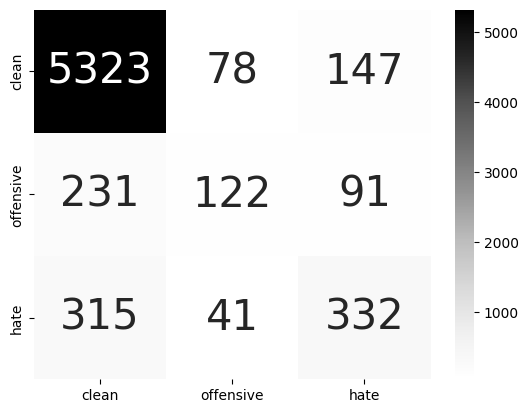

In [ ]:
from keras import models
model = models.load_model('/content/drive/MyDrive/Hate Speech Detection/model/Text_CNN_model_v13.h5')
prediction = model.predict(test_X, batch_size=batch_size, verbose=0)
y_pred = prediction.argmax(axis=-1)

cf1 = confusion_matrix(test_y, y_pred)
print(cf1)

evaluation = f1_score(test_y, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(test_y, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(test_y, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

## Text CNN (fine-tune)

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
MODEL_FILE = '/content/drive/MyDrive/Hate Speech Detection/model/Text_CNN_model_v13_fine_tune.h5'

vocabulary_size = 10000
sequence_length = 100

embedding_dim = 300
batch_size = 256
epochs = 40
drop = [0.25, 0.25, 0.5]

filter_sizes = [2,3,5]
num_filters = [32, 64, 128]

inputs = Input(shape=(sequence_length,), dtype='int32')
embedding = Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length, weights=[embedding_matrix])(inputs)
reshape = Reshape((sequence_length,embedding_dim,1))(embedding)

conv_0 = Conv2D(num_filters[0], kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
# dropout_0 = Dropout(drop[1])(maxpool_0)

conv_1 = Conv2D(num_filters[1], kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_1 = Conv2D(num_filters[0], kernel_size=(25, 1), padding='valid', kernel_initializer='normal', activation='elu')(conv_1)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] - 25 + 1, 1), strides=(1,1), padding='valid')(conv_1)
# dropout_1 = Dropout(drop[1])(maxpool_1)


conv_2 = Conv2D(num_filters[2], kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_2 = Conv2D(num_filters[0], kernel_size=(50, 1), padding='valid', kernel_initializer='normal', activation='elu')(conv_2)
# conv_2 = Conv2D(num_filters[0], kernel_size=(1, 1), padding='valid', kernel_initializer='normal', activation='elu')(conv_2)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] - 50 + 1, 1), strides=(1,1), padding='valid')(conv_2)
# dropout_2 = Dropout(drop[1])(maxpool_2)


# concatenated_tensor = Concatenate(axis=1)([dropout_0, dropout_1, dropout_2])
concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
# fc = Dense(units=1024, activation='softmax')(flatten)
dropout = Dropout(drop[2])(flatten)
output = Dense(units=3, activation='softmax')(dropout)

# this creates a model that includes
ft_model = Model(inputs=inputs, outputs=output)

ft_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 100, 300)     5897100     input_6[0][0]                    
__________________________________________________________________________________________________
reshape_5 (Reshape)             (None, 100, 300, 1)  0           embedding_5[0][0]                
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 98, 1, 64)    57664       reshape_5[0][0]                  
____________________________________________________________________________________________

In [ ]:
checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

ft_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

ft_model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(dev_X, dev_y))  
ft_model.save(MODEL_FILE)

Epoch 1/40
94/94 [==============================] - 39s 43ms/step - loss: 0.6681 - accuracy: 0.7987 - val_loss: 0.5656 - val_accuracy: 0.8215
Epoch 2/40
94/94 [==============================] - 4s 39ms/step - loss: 0.5377 - accuracy: 0.8308 - val_loss: 0.5306 - val_accuracy: 0.8290
Epoch 3/40
94/94 [==============================] - 4s 41ms/step - loss: 0.4939 - accuracy: 0.8407 - val_loss: 0.5018 - val_accuracy: 0.8320
Epoch 4/40
94/94 [==============================] - 4s 39ms/step - loss: 0.4542 - accuracy: 0.8488 - val_loss: 0.4766 - val_accuracy: 0.8335
Epoch 5/40
94/94 [==============================] - 4s 38ms/step - loss: 0.4206 - accuracy: 0.8574 - val_loss: 0.4597 - val_accuracy: 0.8398
Epoch 6/40
94/94 [==============================] - 4s 38ms/step - loss: 0.3905 - accuracy: 0.8647 - val_loss: 0.4414 - val_accuracy: 0.8421
Epoch 7/40
94/94 [==============================] - 4s 39ms/step - loss: 0.3631 - accuracy: 0.8740 - val_loss: 0.4319 - val_accuracy: 0.8481
Epoch 8/40
9

[[5208  142  198]
 [ 225  142   77]
 [ 303   69  316]]
F1 - micro: 0.8482035928143714
F1 - macro: 0.5911830759465998
Accuracy: 0.8482035928143713


<Axes: >

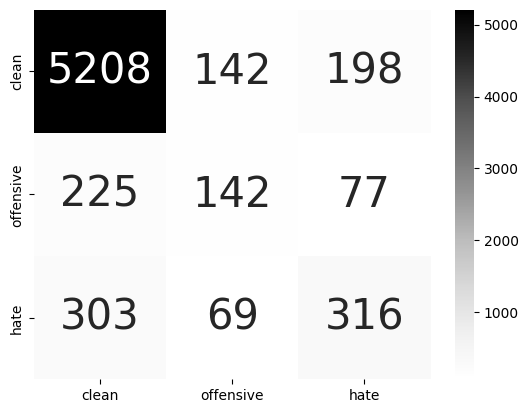

In [ ]:
# from keras import models
# ft_model = models.load_model('/content/drive/MyDrive/Hate Speech Detection/model/Text_CNN_model_v13_fine_tune.h5')
prediction = ft_model.predict(test_X, batch_size=batch_size, verbose=0)
y_pred = prediction.argmax(axis=-1)

cf1 = confusion_matrix(test_y, y_pred)
print(cf1)

evaluation = f1_score(test_y, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(test_y, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(test_y, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

## DNN

In [ ]:
MODEL_FILE = '/content/drive/MyDrive/Hate Speech Detection/model/Text_DNN_model.h5'

vocabulary_size = 10000
sequence_length = 100

embedding_dim = 300
batch_size = 256
epochs = 40
drop = 0.5

filter_sizes = [2,3,5]
num_filters = 32


inputs = Input(shape=(sequence_length,), dtype='int32')
embedding = Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length, weights=[embedding_matrix])(inputs)
reshape = Reshape((sequence_length,1))(inputs)

dense_0 = Dense(1024, activation='elu')(reshape)
dense_0_1 = Dense(512, activation='elu')(dense_0)
dense_0_2 = Dense(256, activation='elu')(dense_0_1)

dense_1 = Dense(512, activation='elu')(reshape)
dense_1_0 = Dense(256, activation='elu')(dense_1)

dense_2 = Dense(256, activation='elu')(reshape)


dense_3 = Dense(32, activation='elu')(dense_0_2)
dense_4 = Dense(32, activation='elu')(dense_1_0)
dense_5 = Dense(32, activation='elu')(dense_2)

concatenated_tensor = Concatenate(axis=1)([dense_3, dense_4, dense_5])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=3, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 reshape_4 (Reshape)            (None, 100, 1)       0           ['input_5[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 100, 1024)    2048        ['reshape_4[0][0]']              
                                                                                                  
 dense_11 (Dense)               (None, 100, 512)     524800      ['dense_10[0][0]']               
                                                                                              

In [ ]:
import tensorflow as tf
checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(dev_X, dev_y))  
model.save(MODEL_FILE)

Epoch 1/40
94/94 [==============================] - 15s 56ms/step - loss: 15.1889 - accuracy: 0.6778 - val_loss: 1.7172 - val_accuracy: 0.8151
Epoch 2/40
94/94 [==============================] - 4s 48ms/step - loss: 0.8264 - accuracy: 0.8067 - val_loss: 0.5668 - val_accuracy: 0.8174
Epoch 3/40
94/94 [==============================] - 5s 49ms/step - loss: 0.5576 - accuracy: 0.8253 - val_loss: 0.5635 - val_accuracy: 0.8204
Epoch 4/40
94/94 [==============================] - 5s 50ms/step - loss: 0.5568 - accuracy: 0.8250 - val_loss: 0.5613 - val_accuracy: 0.8181
Epoch 5/40
94/94 [==============================] - 5s 48ms/step - loss: 0.5560 - accuracy: 0.8244 - val_loss: 0.5607 - val_accuracy: 0.8196
Epoch 6/40
94/94 [==============================] - 5s 51ms/step - loss: 0.5546 - accuracy: 0.8242 - val_loss: 0.5621 - val_accuracy: 0.8211
Epoch 7/40
94/94 [==============================] - 5s 51ms/step - loss: 0.5513 - accuracy: 0.8251 - val_loss: 0.5631 - val_accuracy: 0.8211
Epoch 8/40


[[5500    0   48]
 [ 440    0    4]
 [ 639    0   49]]
F1 - micro: 0.8306886227544911
F1 - macro: 0.3437582445383596
Accuracy: 0.8306886227544911


<Axes: >

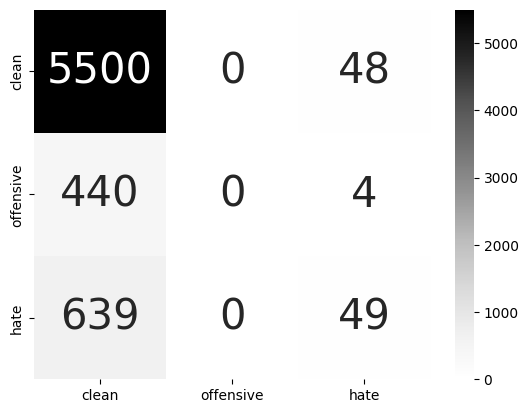

In [ ]:
from keras import models
model = models.load_model('/content/drive/MyDrive/Hate Speech Detection/model/Text_DNN_model.h5')
prediction = model.predict(test_X, batch_size=batch_size, verbose=0)
y_pred = prediction.argmax(axis=-1)

cf1 = confusion_matrix(test_y, y_pred)
print(cf1)

evaluation = f1_score(test_y, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(test_y, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(test_y, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

poly = PolynomialFeatures()
X_poly = poly.fit_transform(train_X)
poly.fit(X_poly, train_y)
lin_poly = LinearRegression()
lin_poly.fit(X_poly, train_y)

LinearRegression()

[[5479    6   63]
 [ 441    0    3]
 [ 642    9   37]]
F1 - micro: 0.8257485029940119
F1 - macro: 0.3328081572799973
Accuracy: 0.8257485029940119


<Axes: >

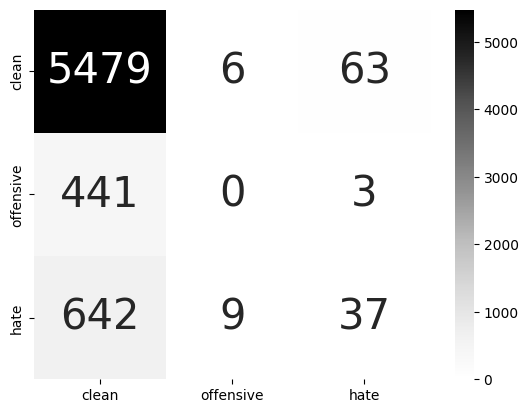

In [ ]:
prediction = lin_poly.predict(poly.fit_transform(test_X))
y_pred = prediction.argmax(axis=-1)
cf1 = confusion_matrix(test_y, y_pred)
print(cf1)

evaluation = f1_score(test_y, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(test_y, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(test_y, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

## XGBoost

In [ ]:
import xgboost as xgb
train_y_arg = train_y.argmax(axis=-1).reshape(-1, 1)
dev_y_arg = dev_y.argmax(axis=-1).reshape(-1, 1)

eval_set = [(dev_X, dev_y_arg)]

xg = xgb.XGBClassifier(objective='multi:softmax', 
                    num_class=3, 
                    missing=1, 
                    early_stopping_rounds=10, 
                    eval_metric=['merror','mlogloss'], 
                    seed=42)
xg.fit(train_X, train_y_arg, eval_set=eval_set)
pickle.dump(xg, open('/content/drive/MyDrive/Hate Speech Detection/model/XGBoost.pkl', "wb"))

[0]	validation_0-merror:0.18226	validation_0-mlogloss:0.87085
[1]	validation_0-merror:0.18114	validation_0-mlogloss:0.74398
[2]	validation_0-merror:0.18151	validation_0-mlogloss:0.66740
[3]	validation_0-merror:0.18301	validation_0-mlogloss:0.62077
[4]	validation_0-merror:0.18114	validation_0-mlogloss:0.59166
[5]	validation_0-merror:0.18226	validation_0-mlogloss:0.57290
[6]	validation_0-merror:0.18114	validation_0-mlogloss:0.56106
[7]	validation_0-merror:0.18001	validation_0-mlogloss:0.55443
[8]	validation_0-merror:0.17964	validation_0-mlogloss:0.55050
[9]	validation_0-merror:0.17964	validation_0-mlogloss:0.54819
[10]	validation_0-merror:0.17964	validation_0-mlogloss:0.54752
[11]	validation_0-merror:0.17964	validation_0-mlogloss:0.54516
[12]	validation_0-merror:0.17889	validation_0-mlogloss:0.54356
[13]	validation_0-merror:0.17889	validation_0-mlogloss:0.54216
[14]	validation_0-merror:0.17777	validation_0-mlogloss:0.54216
[15]	validation_0-merror:0.17889	validation_0-mlogloss:0.54189
[1

[[5469    2   77]
 [ 425    2   17]
 [ 593    6   89]]
F1 - micro: 0.8323353293413174
F1 - macro: 0.3740075213092838
Accuracy: 0.8323353293413174


<Axes: >

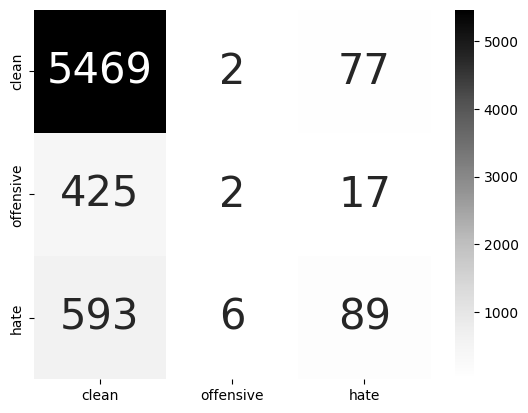

In [ ]:
xg = pickle.load(open('/content/drive/MyDrive/Hate Speech Detection/model/XGBoost.pkl', "rb"))
prediction = xg.predict(test_X)
y_pred = prediction

cf1 = confusion_matrix(test_y, y_pred)
print(cf1)

evaluation = f1_score(test_y, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(test_y, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(test_y, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

## Transformer (PhoBERT)

In [ ]:
!pip uninstall -y transformers accelerate
!pip install transformers accelerate

Found existing installation: transformers 4.31.0.dev0
Uninstalling transformers-4.31.0.dev0:
  Successfully uninstalled transformers-4.31.0.dev0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 29.8 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/huggingface/transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-c2g6o_d6
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-c2g6o_d6
  Resolved https://github.com/huggingface/transformers to commit deff5979fee1f989d26e4946c92a5c35ce695af8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.6 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7170396 sha256=4830e69ac04f4a1e001e52abe5df5d031b886cebb4ac5660088b9a38747d2ee7
  Stored in directory: /tmp/pip-ephem-w

In [ ]:
!pip install vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 60.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645933 sha256=21ba51f1295dbc6f2057659af6271822fe56a8c3f98f5d7ec86508146eb6fc0e
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp


In [ ]:
%cd '/content/drive/MyDrive/Hate Speech Detection/model'
%mkdir PhoBERT
%cd PhoBERT

/content/drive/MyDrive/Hate Speech Detection/model
mkdir: cannot create directory ‘PhoBERT’: File exists
/content/drive/MyDrive/Hate Speech Detection/model/PhoBERT


In [ ]:
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

--2023-06-09 18:47:16--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  97.3MB/s    in 0.3s    

2023-06-09 18:47:18 (97.3 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2023-06-09 18:47:18--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
import pandas as pd
# load data
train = pd.read_csv('/content/drive/MyDrive/Hate Speech Detection/vihsd/train.csv', index_col=False)
dev = pd.read_csv('/content/drive/MyDrive/Hate Speech Detection/vihsd/dev.csv', index_col=False)
test = pd.read_csv('/content/drive/MyDrive/Hate Speech Detection/vihsd/test.csv', index_col=False)
train.reset_index(drop=True)

print(len(train))
print(len(dev))
print(len(test))

24048
2672
6680


In [ ]:
from vncorenlp import VnCoreNLP

vncorenlp = VnCoreNLP("/content/drive/MyDrive/Hate Speech Detection/model/PhoBERT/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

### Tiền xử lí cho riêng PhoBERT

In [ ]:
def preprocess(text, tokenized=True, lowercased=True):
    text = filter_stop_words(text, stopwords)
    text = deEmojify(text)
    text = text.lower() if lowercased else text
    if tokenized:
        pre_text = ""
        sentences = vncorenlp.tokenize(text)
        for sentence in sentences:
            pre_text += " ".join(sentence)
        text = pre_text
    return text

In [ ]:
def pre_process_features(X, y, tokenized=True, lowercased=True):
    X = [preprocess(str(p), tokenized=tokenized, lowercased=lowercased) for p in list(X)]
    for idx, ele in enumerate(X):
        if not ele:
            np.delete(X, idx)
            np.delete(y, idx)
    return X, y

In [ ]:
X_train = train['free_text']
y_train = train['label_id'].values

X_dev = dev['free_text']
y_dev = dev['label_id'].values

X_test = test['free_text']
y_test = test['label_id'].values

### Huấn luyện và kiểm thử

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification

import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from pyvi.ViTokenizer import ViTokenizer

In [ ]:
train_X, train_y = pre_process_features(X_train, y_train, tokenized=True, lowercased = False)
dev_X, dev_y = pre_process_features(X_dev, y_dev, tokenized=True, lowercased = False)
test_X, test_y = pre_process_features(X_test, y_test, tokenized=True, lowercased = False)
  
model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base",use_fast=False)

import torch

class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_encodings = tokenizer(train_X, truncation=True, padding=True, max_length=100)
dev_encodings = tokenizer(dev_X, truncation=True, padding=True, max_length=100)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)

train_dataset = BuildDataset(train_encodings, train_y)
dev_dataset = BuildDataset(dev_encodings, dev_y)
test_dataset = BuildDataset(test_encodings, test_y)


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

In [ ]:
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Hate Speech Detection/model/phobert-v3/',          
    num_train_epochs=2,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,   
    warmup_steps=500,
    weight_decay=0.01,
    no_cuda=False,
    do_eval=True
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()
#trainer.save_model("/content/drive/MyDrive/Hate Speech Detection/model/phobert-v3/")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.551600
1000,0.438600
1500,0.408300
2000,0.331500
2500,0.303700


In [ ]:
y_pred_classify = trainer.predict(test_dataset)

y_pred = np.argmax(y_pred_classify.predictions, axis=-1)
y_true = test_y

cf1 = confusion_matrix(y_true, y_pred)
print(cf1)

evaluation = f1_score(y_true, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(y_true, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

# Show out the confusion matrix
df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})